In [280]:
# Juntar los excel


In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [282]:
df_air = pd.read_csv("air_quality_gijon.csv")

df_mete = pd.read_csv("meteo_gijon.csv")

df_movility = pd.read_csv("movility_gijon.csv")




In [283]:
df_air.head(50)

# Eliminamos una columna repetida en calidad del aire
df_air.drop("NO2_OesteAvdaArgentina.1", axis=1, inplace=True)
df_air.drop("NO_EsteAvdaCastilla", axis=1, inplace=True)

# Eliminamos las columnas de Avenida Castilla y Argentina
df_air.drop("SO2_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("SO2_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("NO2_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("NO2_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("CO_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("CO_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("PM10_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("PM10_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("O3_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("O3_EsteAvdaCastilla", axis=1, inplace=True)



df_air.head(10)


,date,SO2_GijonGlobal,NO_GijonGlobal,NO2_GijonGlobal,CO_GijonGlobal,PM10_GijonGlobal,O3_GijonGlobal
0,2023-12-18,14.0,141.0,73.0,0.86,164.0,72.0
1,2021-12-13,26.0,239.0,75.0,6.45,199.0,38.0
2,2022-10-13,21.0,43.0,42.0,2.16,70.0,58.0
3,2019-07-29,26.0,57.0,31.0,3.87,86.0,71.0
4,2021-11-26,19.0,44.0,67.0,3.02,77.0,76.0
5,2020-10-04,15.0,7.0,31.0,2.48,33.0,71.0
6,2021-11-09,6.0,115.0,69.0,1.42,102.0,68.0
7,2023-08-09,11.0,43.0,36.0,1.04,65.0,101.0
8,2023-02-14,26.0,170.0,93.0,3.84,92.0,80.0
9,2023-04-27,6.0,42.0,35.0,1.19,42.0,73.0


In [284]:
#df_mete.head()



In [285]:
#df_movility.head()

In [286]:
# Unir por date
df_movility_air = pd.merge(df_movility, df_air, on='date', how='outer')
df_meteo_air = pd.merge(df_mete, df_air, on='date', how='outer')

merged_df = pd.merge(df_movility, df_meteo_air)


In [287]:
merged_df.head()

,date,C01_BibioArenaMestas_trafico,C02_CentroPlaya_trafico,C03_CentroLlano_trafico,C04_LaviadaPoligono_trafico,C05_CotoViesques_trafico,C06_LlanoPumarin_trafico,C07_LlanoMontevil_trafico,C08_NuevoGijonBrana_trafico,C09_LaCalzada_trafico,...,presMax_Gijon,dir_Gijon,velmedia_Gijon,racha_Gijon,SO2_GijonGlobal,NO_GijonGlobal,NO2_GijonGlobal,CO_GijonGlobal,PM10_GijonGlobal,O3_GijonGlobal
0,2022-05-09,4027.5,3175.0,3135.0,4031.0,3107.0,2020.0,3297.0,2900.5,3120.0,...,1015.700000,99.0,1.65,5.70,14.0,63.0,54.0,1.86,136.0,102.0
1,2022-08-24,3363.0,3536.0,3143.0,3956.5,2571.0,1928.5,2969.0,2361.0,2502.0,...,1012.266667,65.5,1.50,6.10,4.0,11.0,26.0,0.47,43.0,51.0
2,2022-02-15,3720.5,3199.0,2972.0,4014.0,3359.0,2080.5,2574.0,3004.0,3249.0,...,1021.133333,24.5,3.75,11.25,32.0,39.0,56.0,1.90,64.0,90.0
3,2021-08-26,3829.0,3788.5,3261.0,4348.0,2700.0,1930.0,2324.0,2711.5,3122.0,...,1010.166667,7.5,3.75,9.75,4.0,48.0,41.0,0.55,47.0,90.0
4,2022-01-28,823.0,719.0,672.0,911.0,852.0,471.0,698.0,699.0,784.0,...,1031.033333,9.5,3.35,10.55,4.0,9.0,30.0,0.59,53.0,83.0


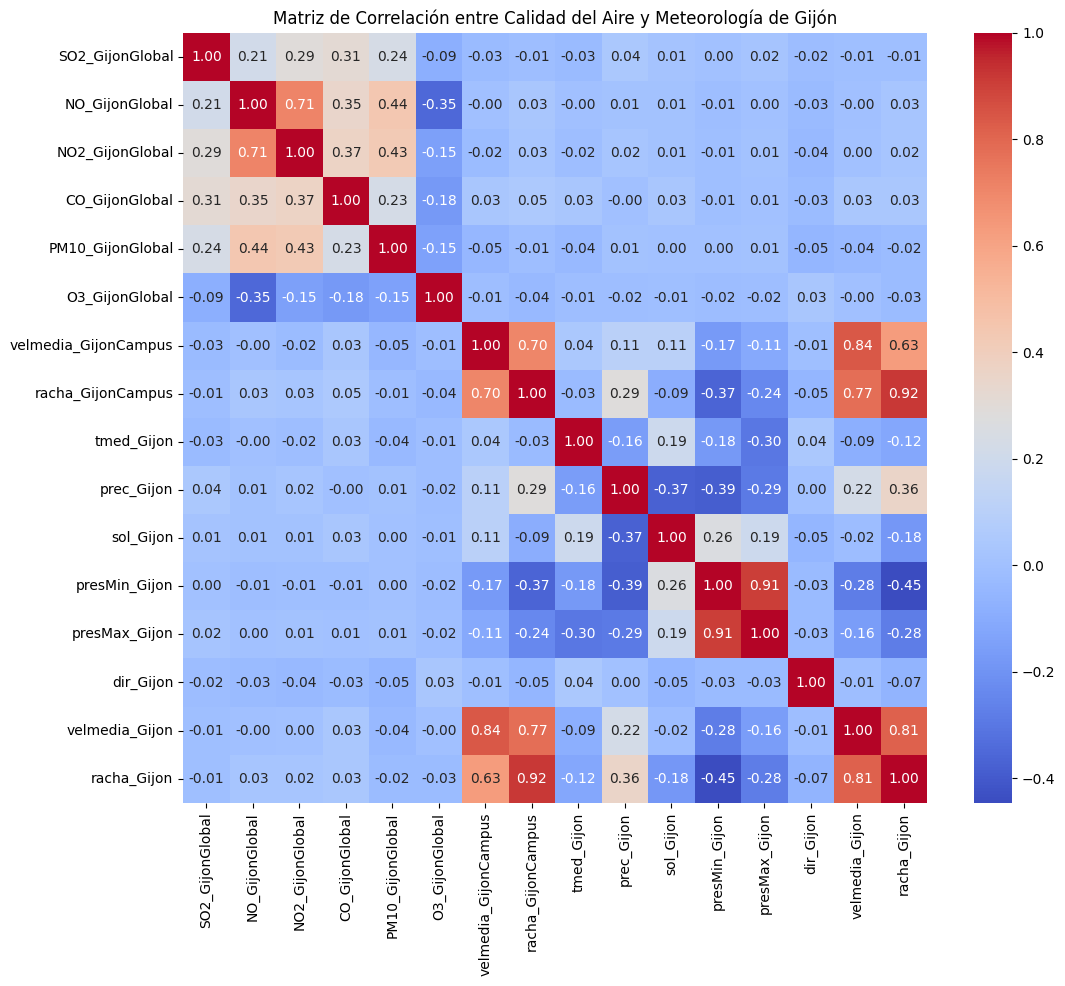

In [288]:
variables_meteo = df_mete.columns
variables_air = df_air.columns


# Crear un DataFrame combinando las variables de calidad del aire y meteorología
df_combined = pd.concat([df_air[variables_air], df_mete[variables_meteo]], axis=1)


df_combined.drop(columns=['date'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Calidad del Aire y Meteorología de Gijón")
plt.show()

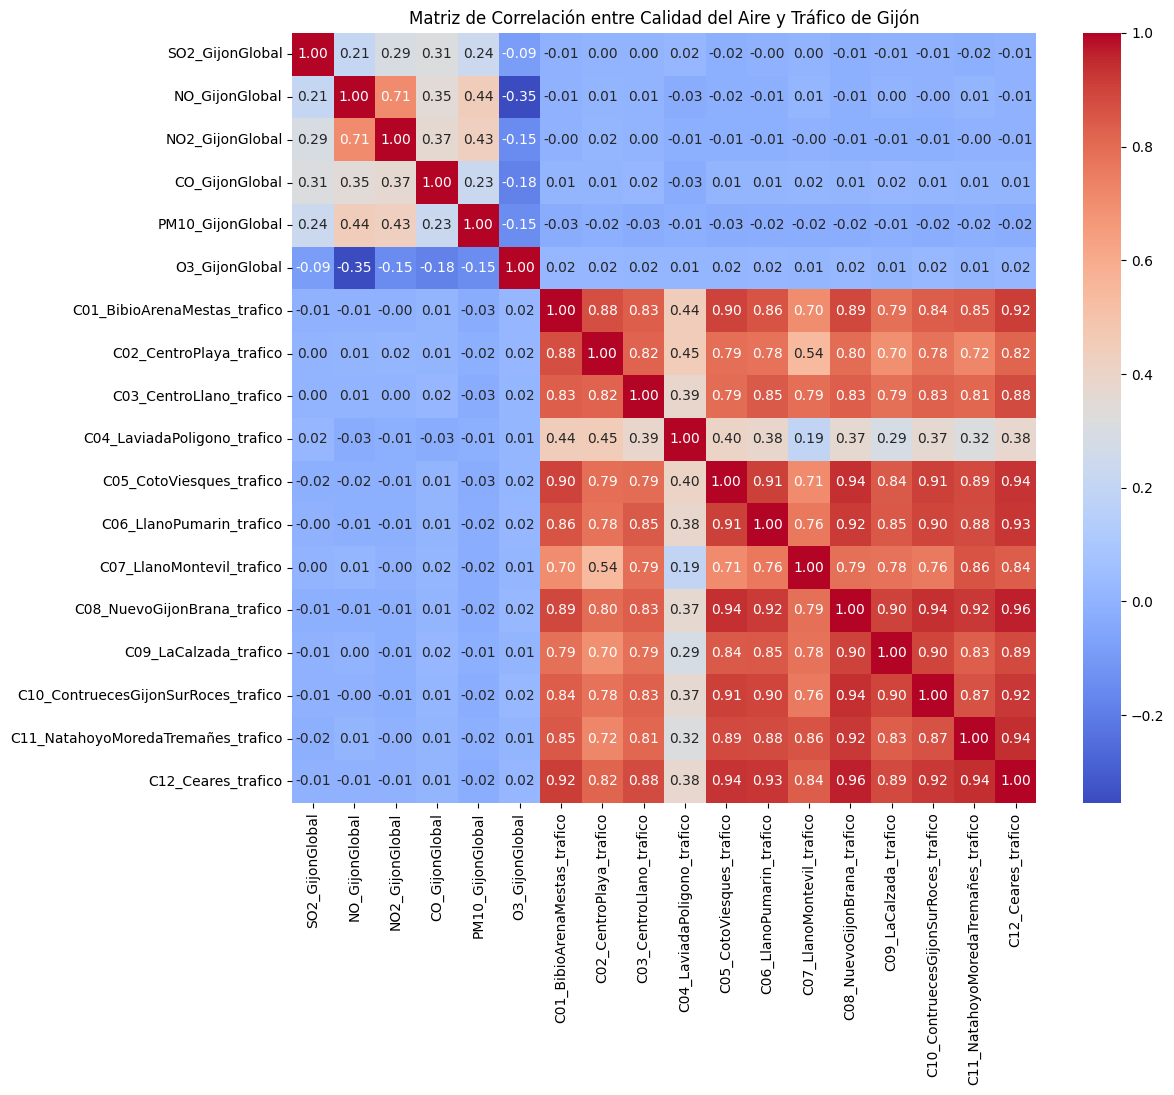

In [289]:
variables_movility = df_movility.columns
variables_air = df_air.columns


# Renombrar las columnas
df_movility.columns = df_movility.columns.str.replace('C\d+_', '')



variables_movility = df_movility.columns

# Crear un DataFrame combinando las variables de calidad del aire y meteorología
df_combined = pd.concat([df_air[variables_air], df_movility[variables_movility]], axis=1)


df_combined.drop(columns=['date'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Calidad del Aire y Tráfico de Gijón")
plt.show()